# Assignment 2 #
### Due: Friday, September 22 to be submitted via Canvas by 11:59 pm ###
### Total points: **85** ###

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

### Note that:
###1. Only one student per group needs to submit the assignment on Canvas;
###2. Make sure to include both students' names, UT EIDs and homework group number in your submitted notebook;
###3. Please make sure your code runs, the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)
### 4. Late submissions receive 0 points.

# Question 1: Bias and Variance (**10 pts**)

(a). (**4 pts**) Describe the difference between model bias and the bias of a point estimator.

(b) (**6 pts**). How can you use a learning curve to determine whether a model is overfitting  (for a given sample size)? Discuss this with respect to the observed train and validation error curves. How does your answer change if the model you are trying to determine is underfitting?

# Question 2: Bias-Variance Exploration (**20 points**)
Consider a function $g$ such that $g(x)=2sin(\pi
x)cos(3\pi x^2)$. We will try to fit this function using a simple (binning based) piecewise constant function with varying number of bins. Here the number of bins controls the model complexity.

Note: problem below uses the statistics notation: target is y and your estimates are $y_{hat}$.


a) (2 points) Generate a dataset $(D = X,Y)$ by generating a set of 1-dimensional x's and y's in the following way -
*  $x_i = \frac{i}{2000}$ for each $i$ in $1, 2, 3 \ldots 2000$.
* Then, for each of the $x_i$'s obtain $y_i = 2sin(\pi x_i)cos(3\pi x_i^2)+ N(0,1)$ where $N(0,1)$ denotes the normal distribution with mean 0 and variance 1.

Create 10 such datasets by independently repeating the entire process 10 times. Plot any one of the generated datasets.

In [ ]:
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
def generate_data(num_points):
  x = np.arange(1, num_points + 1) / num_points
  ### START CODE ###
  # Compute y according to the labeling function g
  y = None
  ### END CODE ###
  return x,y

In [ ]:
datasets = {}
for j in range(10):
  datasets[j] = {}
  datasets[j]['X'], datasets[j]['Y'] = generate_data(2000)

### START CODE ###
# Plot y v.s. x of any one of the dataset
### END CODE ###


b) (5 points) Consider an estimator of function $g$, $f(x)$ that divides the x's into $K$ bins such that there are $m = n/K$ data points in each bin and the predicted y for all points in that bin is the mean of all the $y$'s in the bin.
$$
f(x) = \sum_{j=1}^{K} \bar{y}_j \mathbb{1}(x \in \text{bin } j)
$$
where
$$
\bar{y}_j = \frac{1}{m}\sum_{i=j*m}^{(j+1)*m-1} y_i.
$$
Implement this estimator. Obtain $Y_{hat} = f(x)$ for one of the datasets created above by using $K=25$ and plot the predicted $Y_{hat}$ along with $X$ and $Y$.



In [ ]:
### START CODE ###
# Implement Estimator
### END CODE ###

In [ ]:
### START CODE ###
# Plot predicted y_{hat} along with X and Y
### END CODE ###

c) (3 points) What do you think will happen to the MSE, the bias and the variance as the number of bins $K$ is increased?



d) (5 points) For each dataset, vary the number of bins $K \in \{2,5,10,25,50,100,250, 500, 1000\}$ and obtain the predictions. Also, for any one of the datasets (your choice), compute and plot the MSE obtained with varying $K$.

In [ ]:
mse_scores = []
K = [2,5,10,25,50,100,250,500,1000]
for n in K:
  ### START CODE ###
  # For the chosen dataset, compute y_hat
  ### END CODE ###

  ### START CODE ###
  # Compute MSE
  mse = None
  ### END CODE ###
  mse_scores.append(mse)
plt.plot(K,mse_scores)
plt.show()

e) (5 points) Recall the definitions of the bias and variance, and now given the predictions obtained from 10 different datasets, compute the (sample) bias and variance of the model for each of the $K \in \{2,5,10,25,50,100,250,500,1000\}$ and plot $K$  bias-squared vs $K$ and variance vs. $K$  on the same plot.
We are using the term "sample" to remember that bias/variance are "expected quantities" that we are approximating by considering only 10 models, one per dataset.

If y_pred denotes the 2000 x 10 2-D matrix of estimates for 2000 data points and obtained by the function estimated from the 10 datasets, use the following code to obtain the sample bias and variance.

In [ ]:
bias_vals = []
var_vals = []
K = [2,5,10,25,50,100,250,500,1000]
pred_y = np.zeros((len(datasets[0]['Y']),10)) # axis 0: number of data points, axis 1: number of datasets (10)

for n in K:
  for j in datasets.keys():
    x = datasets[j]['X']
    y = datasets[j]['Y']
    ### START CODE ###
    # Estimate y_{hat}
    y_hat = None
    ### END CODE ###
    pred_y[:,j] = y_hat

  ### START CODE ###
  # Compute the mean of the estimates over 10 datasets for each input x_{i}
  avg_yhat = None # 1D array of shape (2000,)
  # Compute the MSE between avg_yhat and y as bias
  bias = None
  # Compute the variance of the estimates over 10 datasets for each input x_{i}, then average over all inputs
  var_yhat = None
  ### END CODE ###
  bias_vals.append(bias)
  var_vals.append(var_yhat)
plt.plot(K, bias_vals)
plt.plot(K, var_vals)
plt.show()

# Question 3: Stochastic Gradient Descent Improvements (**10 pts**)

## Part 1. (**5 pts**) ##
Read this [blog](https://medium.com/optimization-algorithms-for-deep-neural-networks/gradient-descent-with-momentum-dce805cd8de8) on medium and describe in your own words how momentum leads to a faster convergence of the loss function.


<div style="background-color: #f0f8ff; padding: 10px;">
   <font color="black" face="verdana" size="3"> 
Gradient descent with momentum leads to faster convergence of the loss function because it calculates exponentiated weights of the gradients and uses them to update weights. In traditional gradient descent, a higher learning rate can lead to divergence from the local minimum and potentially diverge our algorithm on the other side of the contour. Gradient descent with momentum operates by averaging oscillations both vertically and horizontally. As a result, the average of vertical oscillations approaches zero, while the horizontal oscillations are more pronounced. The derivatives of the horizontal oscillations point toward the local minimum, aiding our algorithm in reaching it via a more direct path. This path significantly expedites the journey to the local minimum, resulting in faster convergence of the loss function.
</font>
</div>

## Part 2. (**5 pts**) ##
Read this [blog](https://sweta-nit.medium.com/batch-mini-batch-and-stochastic-gradient-descent-e9bc4cacd461) on medium and explain in your own words the advantages of Mini-batch Stochastic Gradient Descent.


<div style="background-color: #f0f8ff; padding: 10px;">
   <font color="black" face="verdana" size="3"> 

We'll talk about mini-batch and and stochastic gradient descent and discuss it's advantages: 

Mini-batch - It is a variation of gradient descent in which dataset is split into batches and these batches are then used to calculate the loss function/errors and update weights.

Advantages of Mini-batch:
- Model update frequency is higher than traditional gradient descent since we're not updating for the full and only doing it in batches
- More efficient since all data is not in memory and algorithm implementation
- Computationally more efficient process

Stochastic Gradient Descent - It is also a variation of gradient descent in which the loss function/errors are calculated and the weights are updated for each record in the dataset.

Advantages of Stochastic Gradient Descent:
- It is faster than gradient descent and mini-batch gradient descent
- Memory consumption is low
- Weights are updated faster as the algorithm is running for every record
- Loss function is calculated after viewing one record and not waiting to be calculated after viewing the full dataset


</font>
</div>

# Question 4: Stochastic Gradient Descent (30 pts)

## Part 1. (**10 pts**) Stochastic gradient descent derivation ##

Use stochastic gradient descent to derive the coefficent updates (assuming squared loss is being used as the cost function) for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：

$$ y = w_0 + w_1e^{-x_1} + w_2 x_1 + w_3x_1x_2 $$




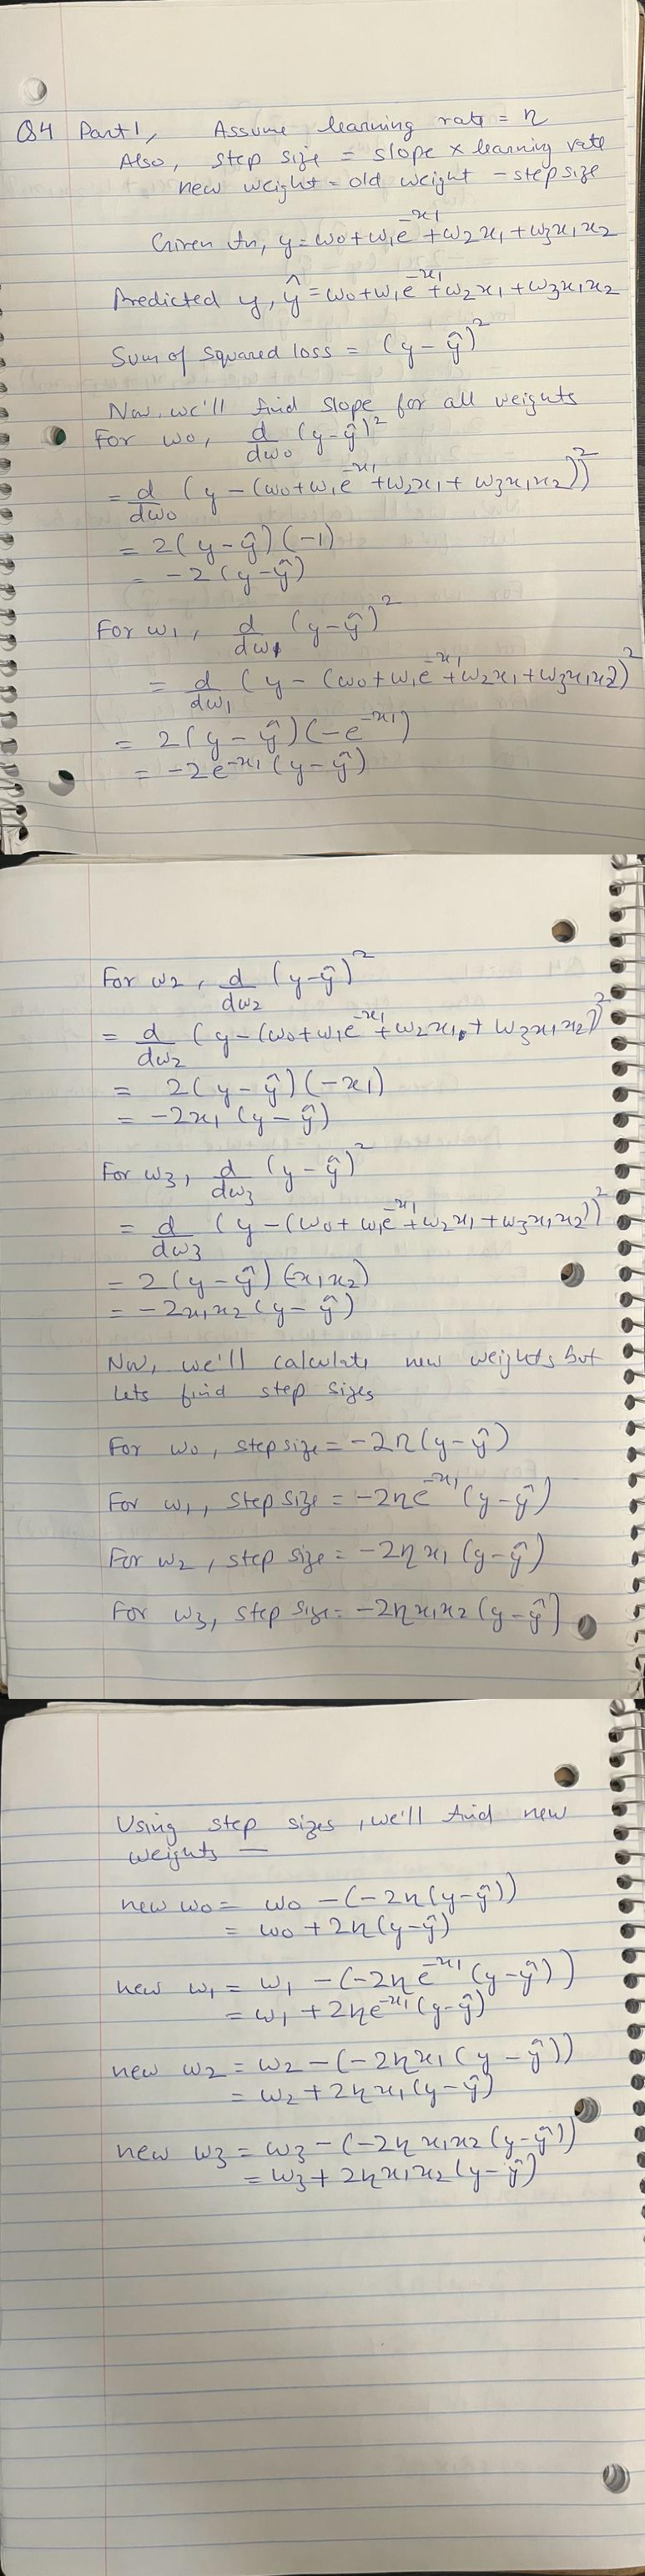

In [1]:
from IPython import display

display.Image("https://raw.githubusercontent.com/milindbhatiaa/Advance_Machine_Learning/main/HW2/Images/Q4_part1_compiled.png")

## Part 2. (**20 pts**) Stochastic gradient descent coding ##

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1e^{-x_1} + w_2x_1 + w_3x_1x_2 $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values).

a) (**15 pts**) Use the expression derived in part 1 to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) .

b) (**5 pts**) Report the MSE of the two best combinations of learning rate and regularization constant.

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file.
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

In [21]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:

    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        # initialize whichever variables you would need here
        self.coef = np.zeros(4)

    def sgd(self, gradient):
        # Update the self.coef using SGD
        ### START CODE ###
        self.coef = self.coef - self.learning_rate* gradient
        ### END CODE ###

    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                ### START CODE ###
                error = y[i] - self.linearPredict(X[i])
                ### END CODE ###

                # Compute gradients
                ### START CODE ###
                gradient = -2 * (error * X[i] + X[i]*self.regularization)
                ### END CODE ###

                # Update weights
                ### START CODE ###
                self.sgd(gradient)
                ### END CODE ###

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = np.exp(-X[:,0])
        x[:,2] = X[:,0]
        x[:,3] = X[:,0]*X[:,1]

        return x

    def linearPredict(self, X):
        # Compute the dot product of self.coef and X
        ### START CODE ###
        return np.dot(X,self.coef)
        ### END CODE ###

In [22]:
data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

In [32]:
# Iterate through all combinations of learning rates and regularization strength
# Use your Regression class to fit the data and record MSEs
### START CODE ###
mse_output = {}

for r in regularization:
    for lr in learning_rate:
        linear_mod = Regression(lr, r, n_epochs)
        linear_mod.fit(X,y)
        mse_output[(r,lr)] = linear_mod.lowest_mse

for r, lr in mse_output:
    err = mse_output[(r,lr)]
    print(f"Regularization Strength: {r}, Learning Rate: {lr} , MSE: {err}")

mse_o_s = sorted(mse_output.items(), key=lambda x: x[1])
print()
print('The lowest MSEs are: ')
# Print the two least values and their corresponding keys
for key, value in mse_o_s[:2]:
    print(f"Key: {key}, Value: {value}")
### END CODE ###

/var/folders/2q/jjvry_s10q578x_6qd2kc8j00000gn/T/ipykernel_94470/356299303.py:45: RuntimeWarning: overflow encountered in square
  mse.append(np.mean(residuals**2))
/var/folders/2q/jjvry_s10q578x_6qd2kc8j00000gn/T/ipykernel_94470/356299303.py:19: RuntimeWarning: invalid value encountered in subtract
  self.coef = self.coef - self.learning_rate* gradient
/var/folders/2q/jjvry_s10q578x_6qd2kc8j00000gn/T/ipykernel_94470/356299303.py:35: RuntimeWarning: overflow encountered in multiply
  gradient = -2 * (error * X[i] + X[i]*self.regularization)
/var/folders/2q/jjvry_s10q578x_6qd2kc8j00000gn/T/ipykernel_94470/356299303.py:19: RuntimeWarning: overflow encountered in multiply
  self.coef = self.coef - self.learning_rate* gradient


Regularization Strength: 0, Learning Rate: 0.0001 , MSE: 0.03435281387070499
Regularization Strength: 0, Learning Rate: 0.001 , MSE: 0.028842167362254176
Regularization Strength: 0, Learning Rate: 0.01 , MSE: 0.027444548002430152
Regularization Strength: 0, Learning Rate: 0.1 , MSE: 0.03506543113135946
Regularization Strength: 0, Learning Rate: 1 , MSE: nan
Regularization Strength: 0, Learning Rate: 10 , MSE: nan
Regularization Strength: 0, Learning Rate: 100 , MSE: nan
Regularization Strength: 10, Learning Rate: 0.0001 , MSE: 87.53045607676121
Regularization Strength: 10, Learning Rate: 0.001 , MSE: 99.86736709274871
Regularization Strength: 10, Learning Rate: 0.01 , MSE: 100.05398202362333
Regularization Strength: 10, Learning Rate: 0.1 , MSE: 101.27021928785497
Regularization Strength: 10, Learning Rate: 1 , MSE: nan
Regularization Strength: 10, Learning Rate: 10 , MSE: nan
Regularization Strength: 10, Learning Rate: 100 , MSE: nan
Regularization Strength: 100, Learning Rate: 0.0001

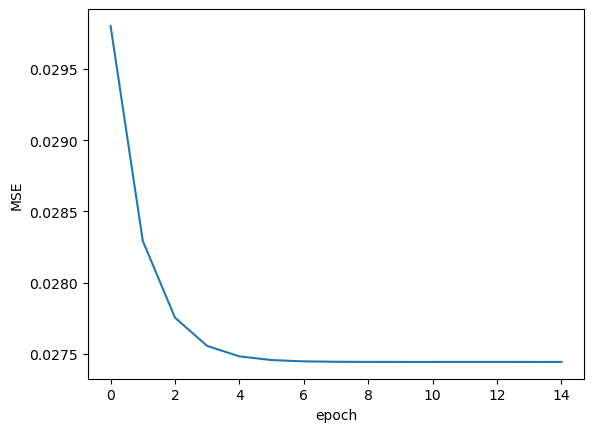

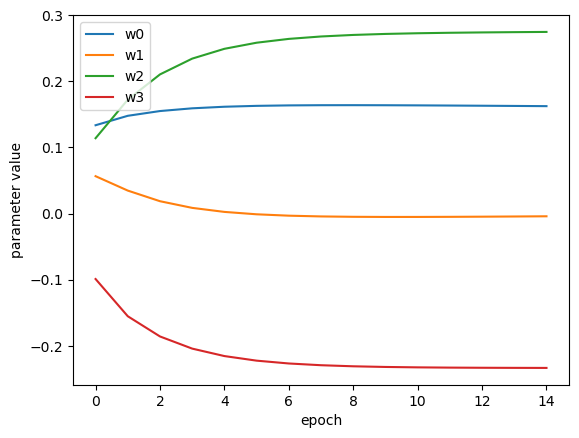

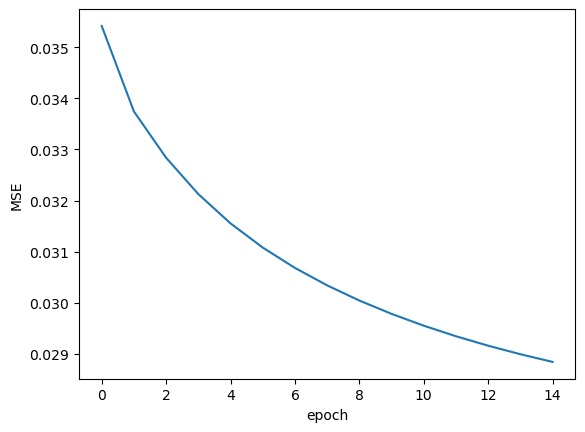

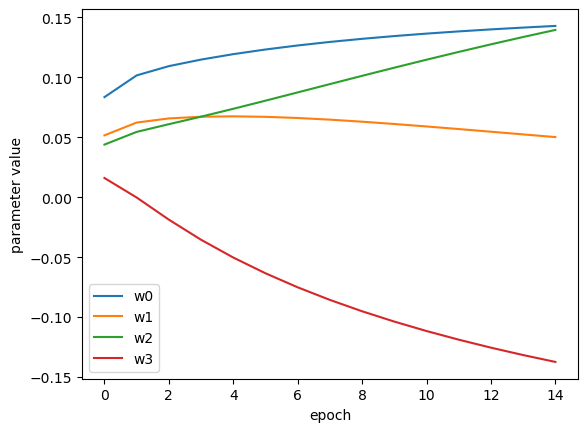

In [37]:
# For the best two combinations, use the plot option in Regression.fit() to plot MSE and parameters as a function of epoch (15 epochs)
### START CODE ###

best_reg = [0]
best_lr = [0.01,0.001]

for r in best_reg:
    for lr in best_lr:
        mod_ln = Regression(lr, r, n_epochs)
        mod_ln.fit(X,y,plot=True)    
### END CODE ###

# Question 5: Visualizing Gradient Descent (**15 pts**) #

## Part 1. **(10 pts)** Coding ##

In this exercise, you are going to visualize four batch update steps of gradient descent for a  linear regression model with two parameters (i.e. weights, indicated by $\theta$).

The true target function is $t = \theta_{0} + \theta_{1}x$ with $\theta_{0}=2$ and $\theta_{1}=0.5$.

Try the following two initializations:
* $\theta_{0}=0$ and $\theta_{1}=0$
* $\theta_{0}=0$ and $\theta_{1}=-4$

and try the following three learning rates:
* 0.5
* 1
* 2.1

Therefore, there will be **six** combinations or settings to consider in total. For each setting, you will plot (a) the data and the changing linear regression fit and (b) the model parameters moving in the weight space after every update.

In [ ]:
# Generate data
np.random.seed(42)
m = 20
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x + np.random.normal(0, 0.2, size=x.shape)

In [ ]:
def loss_func(theta0, theta1):
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y - model(x, theta0, theta1))**2, axis=2)/2

def model(x, theta0, theta1):
    return theta0 + theta1 * x

In [ ]:
# Experiment with different initialization and learning rate combinations
### START CODE ###
init_list = [None]
lr_list = [None]
### END CODE ###

# Left column shows the data and the changing linear regression models
# Right column shows the model parameters moving over the loss landscape
fig, ax = plt.subplots(nrows=len(init_list) * len(lr_list), ncols=2, figsize=(12, 36))

for i, init in enumerate(init_list):
    for j, lr in enumerate(lr_list):
        row_idx = i * len(lr_list) + j
        ax[row_idx][0].scatter(x, y, marker='x', s=40, color='k')
        theta0_grid = np.linspace(-1,5,101)
        theta1_grid = np.linspace(-5,5,101)
        L_grid = loss_func(theta0_grid[np.newaxis,:,np.newaxis],
                           theta1_grid[:,np.newaxis,np.newaxis])

        # A labeled contour plot for the right column
        X, Y = np.meshgrid(theta0_grid, theta1_grid)
        contours = ax[row_idx][1].contour(X, Y, L_grid, 30)
        ax[row_idx][1].clabel(contours)
        # The target parameter values indicated on the loss function contour plot
        ax[row_idx][1].scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

        # Take N = 4 steps with learning rate alpha down the steepest gradient, starting at init
        N = 4
        theta = [init] # placeholder list for storing historical parameters
        L = [loss_func(*theta[0])[0]] # placeholder list for storing historical loss values
        for _ in range(N):
            last_theta = theta[-1]
            this_theta = np.empty((2,))
            # Update theta
            ### START CODE ### (2 lines of code)
            this_theta[0] = None
            this_theta[1] = None
            ### END CODE ###
            theta.append(this_theta)
            L.append(loss_func(*this_theta))

        # Annotate the loss function plot with coloured points indicating the
        # parameters chosen and red arrows indicating the steps down the gradient.
        # Also plot the fit function on the LHS data plot in a matching colour.
        colors = ['b', 'g', 'm', 'c', 'orange']
        ax[row_idx][0].plot(x, model(x, *theta[0]), color=colors[0], lw=2,
                   label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[0]))
        for k in range(1,N+1):
            ax[row_idx][1].annotate('', xy=theta[k], xytext=theta[k-1],
                           arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                           va='center', ha='center')
            ax[row_idx][0].plot(x, model(x, *theta[k]), color=colors[k], lw=2,
                   label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[k]))
        ax[row_idx][1].scatter(*zip(*theta), c=colors, s=40, lw=0)

        # Labels and titles.
        ax[row_idx][1].set_xlabel(r'$\theta_0$')
        ax[row_idx][1].set_ylabel(r'$\theta_1$')
        ax[row_idx][1].set_title(f'Loss function (Init:[{init[0]},{init[1]}], LR:{lr})')
        ax[row_idx][0].set_xlabel(r'$x$')
        ax[row_idx][0].set_ylabel(r'$y$')
        ax[row_idx][0].set_title(f'Data and Fit (Init:[{init[0]},{init[1]}], LR:{lr})')
        axbox = ax[row_idx][0].get_position()

plt.show()

## Part 2. **(5 pts)** ##
For the experiment above, briefly summarize what you observed about the impact of (i) initialization and (ii) learning rate, on the evolution of the model parameters.